 # Plot Time Series Data.

### Import required packages.

In [18]:
from pathlib import Path

import pandas as pd
import numpy as np 
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pylab as plt
%matplotlib inline


### Create time series data set and plot time series data.

In [19]:
# Create data frame.
Amtrak_data = pd.read_csv('Amtrak.csv')

# Convert the date information to a datetime object as monthly data.
Amtrak_data['Date'] = pd.to_datetime(Amtrak_data.Month, 
                        format='%m/%d/%Y')

# Convert data frame column to time series (name is used 
# to label the data).
ridership_ts = pd.Series(Amtrak_data.Ridership.values, 
                index=Amtrak_data.Date, name='Ridership')

# Define the time series frequency.
ridership_ts.index = pd.DatetimeIndex(ridership_ts.index, 
                        freq=ridership_ts.index.inferred_freq)

# Show/print first 5 records of the time series dataset.
ridership_ts.head()

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
Freq: MS, Name: Ridership, dtype: float64

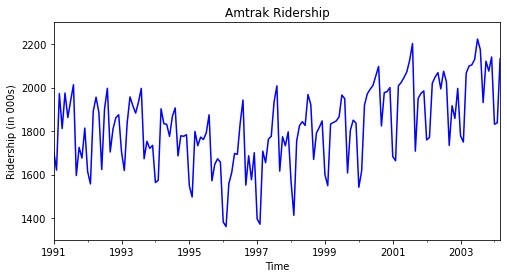

In [20]:
# Plot time series data.
ax = ridership_ts.plot(figsize = (8,4), color = "blue")
ax.set_xlabel('Time')
ax.set_ylabel('Ridership (in 000s)')
ax.set_ylim(1300, 2300)
plt.title('Amtrak Ridership') 
plt.show()

### Develop regression models for time series data. Plot time series data with regression models. 

In [21]:
# Create a time series with additional linear trend term using 
# training data('t' as independent variable). 
ridership_df = tsatools.add_trend(ridership_ts, trend='t')
print (ridership_df)

# Fit a linear regression model to the time series with 
# linear trend.
ridership_lin = sm.ols(formula='Ridership ~ trend', 
                       data=ridership_df).fit()


# Create a data frame with additional independent variables 
# from time series: a trend term and a quadratic trend term. 

# Fit a linear regression model to the time series with quadratic trend.
ridership_quad = sm.ols(formula='Ridership ~ trend + np.square(trend)', 
                        data=ridership_df).fit()

            Ridership  trend
Date                        
1991-01-01   1708.917    1.0
1991-02-01   1620.586    2.0
1991-03-01   1972.715    3.0
1991-04-01   1811.665    4.0
1991-05-01   1974.964    5.0
...               ...    ...
2003-11-01   2076.054  155.0
2003-12-01   2140.677  156.0
2004-01-01   1831.508  157.0
2004-02-01   1838.006  158.0
2004-03-01   2132.446  159.0

[159 rows x 2 columns]


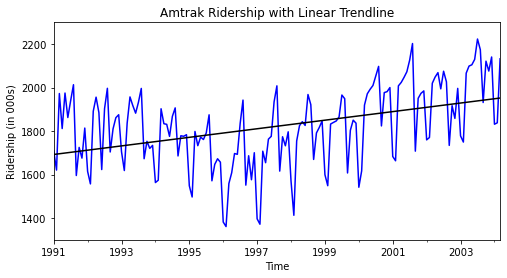

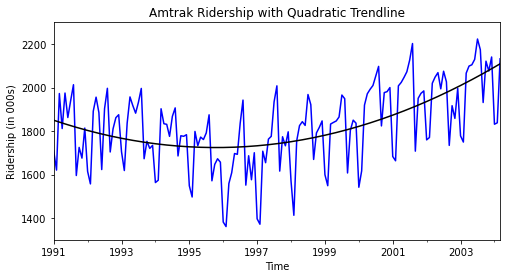

In [22]:
# Create plot of time series with linear trend. 
fig, ax = plt.subplots(figsize=(8,4))
ridership_ts.plot(color = "blue")
ridership_lin.predict(ridership_df).plot(color = "black")
ax.set(xlabel = "Time",
       ylabel = "Ridership (in 000s)",
       ylim = [1300, 2300],
       title = "Amtrak Ridership with Linear Trendline")
plt.show()

# Create plot of time series with quadratic trend. 
fig, ax = plt.subplots(figsize=(8,4))
ridership_ts.plot(color = "blue")
ridership_quad.predict(ridership_df).plot(color = "black")
ax.set(xlabel = "Time",
       ylabel = "Ridership (in 000s)",
       ylim = [1300, 2300],
       title = "Amtrak Ridership with Quadratic Trendline")
plt.show()

### Zoom-in plot of time series data.

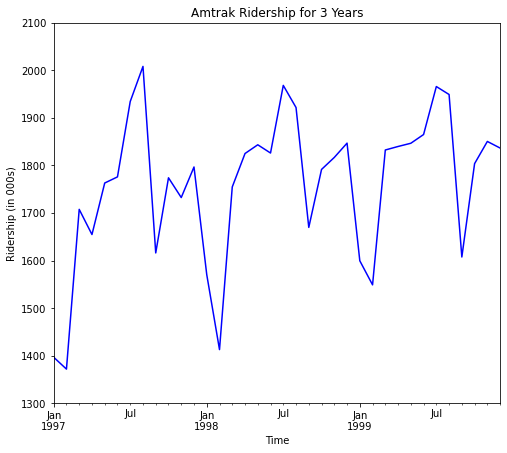

In [23]:
# Create zoom-in (short time series) time series data set 
# from 1997 to 1999 using a slice. 
ridership_ts_3yrs = ridership_ts['1997':'1999']

# Plot time series data.
ax = ridership_ts_3yrs.plot(figsize = (8,7), color = "blue")
ax.set_xlabel('Time')
ax.set_ylabel('Ridership (in 000s)')
ax.set_ylim(1300, 2100)
plt.title('Amtrak Ridership for 3 Years') 
plt.show()
